__Assignment 12__

1. [Import](#Import)
1. [Assignment 12](#Assignment-12)
    1. [Load-data](#Load-data)
    1. [Basic K means example](#Basic-K-means-example)    
    1. [Slightly less basic K means example](#Slightly-less-basic-K-means-example)


# Import

<a id = 'Import'></a>

In [1]:
# standard libary and settings
import os
import sys
import importlib
import itertools
import warnings

warnings.simplefilter("ignore")
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))

# data extensions and settings
import numpy as np

np.set_printoptions(threshold=np.inf, suppress=True)
import pandas as pd

pd.set_option("display.max_rows", 500)
pd.options.display.float_format = "{:,.6f}".format

# modeling extensions
import sklearn.cluster as cluster
import sklearn.datasets as datasets
import sklearn.decomposition as decomposition
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocessing

# visualization extensions and settings
import seaborn as sns
import matplotlib.pyplot as plt

# magic functions
%matplotlib inline

# Assignment 12

<a id = 'Assignment-12'></a>

## Load data

<a id = 'Load data'></a>

In [2]:
# load and inspect wine data
wine_data = datasets.load_wine()
df_wine = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
df_wine[:5]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.230000,1.710000,2.430000,15.600000,127.000000,2.800000,3.060000,0.280000,2.290000,5.640000,1.040000,3.920000,"1,065.000000"
1,13.200000,1.780000,2.140000,11.200000,100.000000,2.650000,2.760000,0.260000,1.280000,4.380000,1.050000,3.400000,"1,050.000000"
2,13.160000,2.360000,2.670000,18.600000,101.000000,2.800000,3.240000,0.300000,2.810000,5.680000,1.030000,3.170000,"1,185.000000"
3,14.370000,1.950000,2.500000,16.800000,113.000000,3.850000,3.490000,0.240000,2.180000,7.800000,0.860000,3.450000,"1,480.000000"
4,13.240000,2.590000,2.870000,21.000000,118.000000,2.800000,2.690000,0.390000,1.820000,4.320000,1.040000,2.930000,735.000000


In [3]:
# review uniques classes
wine_data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

> Remarks - There are three different classes, so we will be hoping to identify three different clusters with KMeans.

## Reduce dimensionality

<a id = 'Reduce-dimensionality'></a>

In [4]:
# standardize data and perform principal component analysis to reduce to 2 features
X = df_wine.values

sc = preprocessing.StandardScaler()
Xstd = sc.fit_transform(X)

pca = decomposition.PCA(n_components=2)
Xpca = pca.fit_transform(Xstd)
Xpca[:5]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082]])

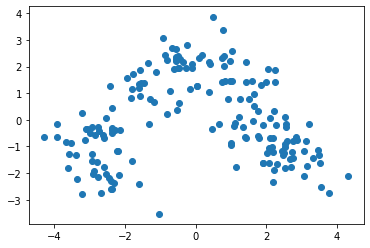

In [5]:
# visualize data in two dimensions to evaluate clustering potential
plt.scatter(Xpca[:, 0], Xpca[:, 1])

> Remarks - There appears to be three different clusters.

In [6]:
# load into data frame that will work with lecture code
data = pd.DataFrame(Xpca, columns=["Dim1", "Dim2"])
data[:5]

,Dim1,Dim2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


## Basic K means example

<a id = 'Basic K means example'></a>

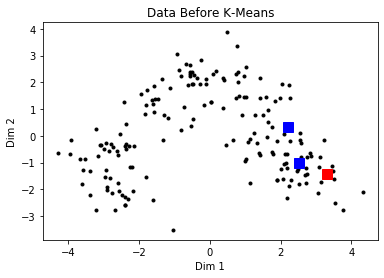

In [7]:
# initializing centers/clusters (all 2 of them for the dataset created)
# in practice, this is up to us to choose the k-value, which is how many clusters we will use to divide the data in
# in this case, 2 clusters is okay
centroidsList = []
numberOfCentroids = 3

# assigning random centroids
for i in range(numberOfCentroids):
    centroid = []
    for d in range(len(data.columns.values)):
        centroid.append(data.iloc[i, d])
    centroidsList.append(centroid)

# Plotting all of the data first, only works with 2D data
plt.plot(data["Dim1"], data["Dim2"], "k.")
# plotting random centroids, centroids will be a lighter color than data points
for ix, centroid in enumerate(centroidsList):
    if ix == 0:
        color = "red"  # hexadecimal for orange
        marker = "s"
    else:
        color = "blue"
        marker = "s"
    plt.plot(centroid[0], centroid[1], color=color, marker=marker, ms=10)
plt.title("Data Before K-Means")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()

> Remarks - the dataset seems to be have clusters, and the initial guess by KMeans leaves room for improvement in the next step.

## Slightly less basic K means example

<a id = 'Slightly-less-basic-K-means-example'></a>

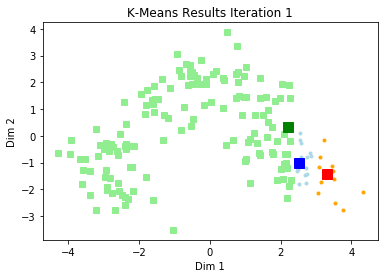

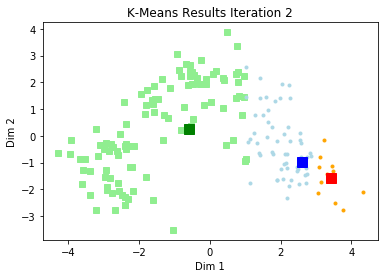

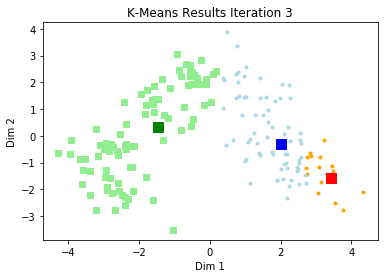

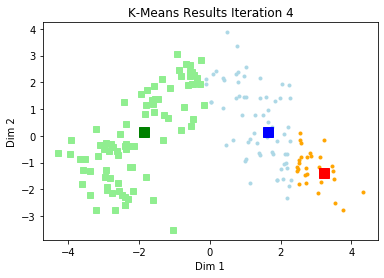

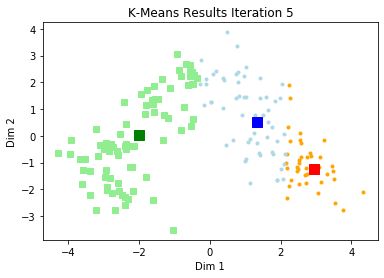

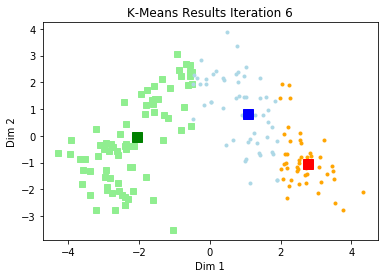

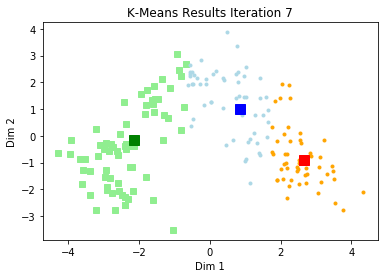

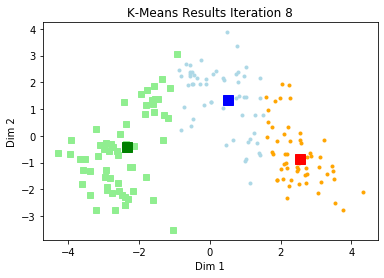

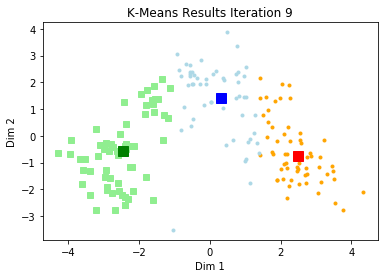

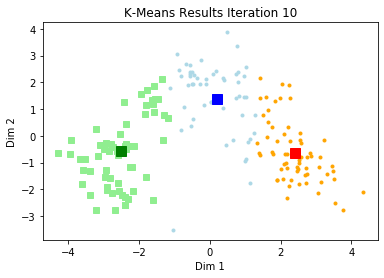

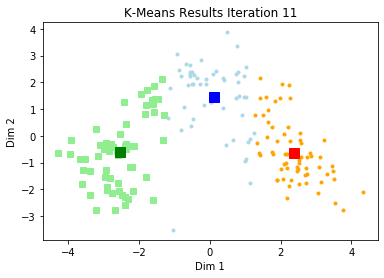

In [8]:
# changing our data to only contain the training features Dim1 and Dim2
featureData = data[["Dim1", "Dim2"]]
centroid_difference = 100000000000

# iterating until the centroids have converged to a specific value, thus clustering our data
iteration = 0
while iteration <= 10:
    iteration = iteration + 1
    centroidBags = [[] for centroid in range(numberOfCentroids)]
    for ix, sample in featureData.iterrows():
        min_distance = 1000000
        selected_centroid = 0
        distance = 0
        # finding which centroid is closest to each sample point, and adding the closest samples
        # to a cluster list of samples which are associated with the given centroid
        for centroid_num in range(len(centroidsList)):
            distance = 0
            for feature_num in range(len(featureData.columns.values)):
                # Euclidean distance without square root, but this is still a notion of a distance
                distance = (
                    distance
                    + (centroidsList[centroid_num][feature_num] - sample[feature_num])
                    ** 2
                )
                if distance < min_distance:
                    min_distance = distance
                    selected_centroid = centroid_num
        centroidBags[selected_centroid].append(list(sample))

    # plotting iteration's centroid values and clusters
    # cluster contents
    for ix, centroid_bag in enumerate(centroidBags):
        if ix == 0:
            color = "orange"
            marker = "."
        elif ix == 1:
            color = "lightgreen"
            marker = "s"
        else:
            color = "lightblue"
            marker = "."
        for sample in centroid_bag:
            plt.plot(sample[0], sample[1], color=color, marker=marker)

    # centroid values
    for ix, centroid in enumerate(centroidsList):
        if ix == 0:
            color = "red"  # hexadecimal for orange
            marker = "s"
        elif ix == 1:
            color = "green"
            marker = "s"
        else:
            color = "blue"
            marker = "s"
        plt.plot(centroid[0], centroid[1], color=color, marker=marker, ms=10)
    plt.title("K-Means Results Iteration " + str(iteration))
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")
    plt.show()

    # used to see if we have converged or not
    previousCentroidsList = centroidsList
    centroidsList = []

    # finding new centroids by averaging out all of the cluster components close to that centroid
    for centroidBag in centroidBags:
        centroid_sum = [sum(sample) for sample in zip(*centroidBag)]
        averageCentroid = [
            centroid_component / len(centroidBag) for centroid_component in centroid_sum
        ]
        centroidsList.append(averageCentroid)

    # checking if the previous iteration's centroids is similar to the current iteration ones
    centroid_difference = 0
    centroid_features = len(centroidsList[0])
    for feature in range(centroid_features):
        for centroid, previous_centroid in zip(centroidsList, previousCentroidsList):
            centroid_difference = centroid_difference + abs(
                centroid[feature] - previous_centroid[feature]
            )

Remarks - I modified the lecture code to run for 10 iterations. Upon arriving at the 10th iteration, this KMeans implementation is identifying 3 clusters in this two dimensional representation of the sklearn wine dataset. The original dataset includes a target features, and there are three unique values in this label feature. Therefore we hope to see three distinct clusters.

PCA was used to reduce the original feature set down to two features to facilitate clear visualization. While this process chose a reasonable set of three clusters, there is clearly some potential overlap where the green cluster meets the blue cluster, as well as where the blue cluster meets the red cluster. The samples on these cluster boarders are most likely to be misclassified by KMeans when compared to the true class labels. That aside, KMeans did an adequate job of identifying three major groupings of samples.